# 数据集准备

## 原始数据准备

### 正向数据

In [ ]:
# 正向数据
import os
import cv2
from tools.pose2box import p2b

now_dir = os.path.abspath("")
imgs_folder = "Data\\Caltech_WebFaces"
txt_path = "Data\\WebFaces_GroundThruth.txt"
pos_info_path = "Samples\\pos.txt"


# 正向数据
pos_info = dict()
with open(txt_path, "r") as file:
    lines = file.readlines()

for l in lines:
    heads, x, y, w, h = p2b(l)
    n = os.path.join(now_dir, imgs_folder, heads[0])
    if n not in pos_info:
        img = cv2.imread(n)
        sp = img.shape
        h = min(h, sp[0] - y)
        w = min(w, sp[1] - x)
        pos_info[n] = {"num": 1, "box": [x, y, w, h], "shape": sp}
    else:
        pos_info[n]["num"] += 1
        h = min(h, pos_info[n]["shape"][0] - y)
        w = min(w, pos_info[n]["shape"][1] - x)
        pos_info[n]["box"] += [x, y, w, h]
pos_info_context = []

for key in pos_info:
    context = f'{key} {pos_info[key]["num"]} '
    for i in pos_info[key]["box"]:
        context += str(i) + " "
    context += "\n"
    pos_info_context.append(context)
with open(pos_info_path, "w") as file:
    file.writelines(pos_info_context)

In [ ]:
# 获取24*24的面部灰度图
import os
import cv2

now_dir = os.path.abspath("")
imgs_folder = "Data\\Caltech_WebFaces"
pos_info_path = "Samples\\pos.txt"
pos_img_folder = "Samples\\pos"
shape = (24, 24)

with open(pos_info_path, "r") as file:
    lines = file.readlines()

img_count = 0
for l in lines:
    l = l.split(" ")
    n = int(l[1])
    bs = l[2:-1]
    img = cv2.imread(l[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for i in range(n):
        x, y, w, h = (
            int(bs[4 * i]),
            int(bs[4 * i + 1]),
            int(bs[4 * i + 2]),
            int(bs[4 * i + 3]),
        )
        face = img[y : y + h, x : x + w]
        face = cv2.resize(face, shape)
        sv_path = os.path.join(pos_img_folder, f"{img_count:05d}.jpg")
        cv2.imwrite(sv_path, face)
        img_count += 1

### 反向数据

In [ ]:
# 反向数据

import os
import cv2
import glob
from tools.pose2box import p2b

now_dir = os.path.abspath("")
imgs_folder = "Data\\Caltech_WebFaces"
txt_path = "Data\\WebFaces_GroundThruth.txt"
neg_img_path = "Data\\NoFaces"
neg_info_path = "Samples\\neg.txt"

pos_info = dict()

with open(txt_path, "r") as file:
    lines = file.readlines()

for l in lines:
    heads, x, y, w, h = p2b(l)
    n = os.path.join(now_dir, imgs_folder, heads[0])
    if n not in pos_info:
        pos_info[n] = {"num": 1, "box": [(x, y, w, h)]}
    else:
        pos_info[n]["num"] += 1
        pos_info[n]["box"] += [(x, y, w, h)]

count = 0
for key in pos_info:
    img = cv2.imread(key)
    boxes = pos_info[key]["box"]
    sp = img.shape
    for b in boxes:
        x, y, w, h = b
        h = min(h, sp[0] - y)
        w = min(w, sp[1] - x)
        img[y : y + h, x : x + w, :] = 127
    sv_path = os.path.join(neg_img_path, f"{count:05d}.jpg")
    cv2.imwrite(sv_path, img=img)
    count += 1

neg_path_list = glob.glob(os.path.join(neg_img_path, "*"))
neg_info_list = [os.path.join(now_dir, neg_pth) + "\n" for neg_pth in neg_path_list]
with open(neg_info_path, "w") as file:
    file.writelines(neg_info_list)

In [ ]:
# 反向数据

import os
import cv2
import random

neg_info_path = "Samples\\neg.txt"
neg_img_folder = "Samples\\neg"
w, h = 24, 24

with open(neg_info_path) as file:
    lines = file.readlines()

img_count = 0
for l in lines:
    l = l[:-1]
    img = cv2.imread(l)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for _ in range(10):
        y = int(0.9 * random.random() * img.shape[0])
        x = int(0.9 * random.random() * img.shape[1])
        y2 = max(int(random.random() * (img.shape[0] - y)), 10)
        x2 = max(int(random.random() * (img.shape[1] - x)), 10)
        noface = img[y : y + y2, x : x + x2]
        noface = cv2.resize(noface, (w, h))
        sv_path = os.path.join(neg_img_folder, f"{img_count:05d}.jpg")
        cv2.imwrite(sv_path, noface)
        img_count += 1

### 测试数据准备

In [ ]:
import cv2
import matplotlib.pyplot as plt

with open("Samples\pos.txt") as f:
    l = f.readlines()
l = l[4121][:-1]
l = l.split(" ")
img = cv2.imread(l[0])
img = cv2.rectangle(
    img,
    (int(l[2]), int(l[3])),
    (int(l[2]) + int(l[4]), int(l[3]) + int(l[5])),
    (0, 255, 0),
    2,
)
p = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(p)
plt.show()
with open("Samples\pos.txt") as f:
    l = f.readlines()
l = l[6384][:-1]
l = l.split(" ")
img = cv2.imread(l[0])
img = cv2.rectangle(
    img,
    (int(l[2]), int(l[3])),
    (int(l[2]) + int(l[4]), int(l[3]) + int(l[5])),
    (0, 255, 0),
    2,
)
p = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(p)
plt.show()

### 测试 haar 特征提取

In [ ]:
import cv2
from src.haar_classifier import haar_feature
import matplotlib.pyplot as plt

h = haar_feature()
h.init_shape()

img_path = "Data\Caltech_WebFaces\pic00010.jpg"
img = cv2.imread(img_path)

pic = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(pic, cmap="gray")
plt.show()
pic1 = cv2.filter2D(pic, -1, h.kernels[0])
plt.imshow(pic1, cmap="gray")
plt.show()
pic1 = cv2.filter2D(pic, -1, h.kernels[3])
plt.imshow(pic1, cmap="gray")
plt.show()

## 训练数据准备

In [ ]:
import os
import glob

now_dir = os.path.abspath("")
pos_sp_folder = "Samples\\pos"
neg_sp_folder = "Samples\\neg"
train_txt = "Samples\\train.txt"
val_txt = "Samples\\val.txt"

pos_num_train = 100
neg_num_train = 5000
pos_num_val = 100
neg_num_val = 500

pos_img_pths = glob.glob(os.path.join(now_dir, pos_sp_folder, "*"))
neg_img_pths = glob.glob(os.path.join(now_dir, neg_sp_folder, "*"))

train_content = []
for i in range(pos_num_train):
    l = pos_img_pths[i]
    l += " 0\n"
    train_content.append(l)
for i in range(neg_num_train):
    l = neg_img_pths[i]
    l += " 1\n"
    train_content.append(l)

val_content = []
for i in range(pos_num_train, pos_num_train + pos_num_val):
    l = pos_img_pths[i]
    l += " 0\n"
    val_content.append(l)
for i in range(neg_num_train, neg_num_train + neg_num_val):
    l = neg_img_pths[i]
    l += " 1\n"
    val_content.append(l)

with open(train_txt, "w") as file:
    file.writelines(train_content)
with open(val_txt, "w") as file:
    file.writelines(val_content)

# 训练

In [ ]:
from src.dataset import imgDataset
from src.haar_classifier import (
    haar_feature,
    MLP,
    haar_adaboost,
    train_haar_model,
    adboost_haar_update,
)
from torch import nn
import torch

sv_path = "runs\\my3_24_24.pt"
d_train = imgDataset("Samples\\train.txt")
haar_f = haar_feature()
haar_f.add_conv_torch()

loss = nn.CrossEntropyLoss(reduction="none")

batch_size = 256
epoch = 300
lr = 1e-3
input_dim = 19 * 19 * 15

clcs = [
    ([input_dim, 100, 2], [nn.ReLU(), None]),
    ([input_dim, 100, 2], [nn.ReLU(), None]),
    ([input_dim, 500, 50, 2], [nn.ReLU(), nn.ReLU(), None]),
]


l = []

torch.cuda.empty_cache()
for params, acts in clcs:
    mlp = MLP(params, acts)
    # freeze params
    d_train.weights.requires_grad = False
    train_haar_model(
        d_train,
        mlp,
        loss,
        batchsize=batch_size,
        epoch=epoch,
        lr=lr,
        haar_f=haar_f,
        device=torch.device("cuda"),
    )
    alp, new_w = adboost_haar_update(
        haar_f, mlp, d_train.imgs, d_train.labels, d_train.weights
    )

    l.append((alp, mlp))
    d_train.weights = new_w

ada_h = haar_adaboost(haar_f, l)
torch.save(ada_h, sv_path)

## 权重更新

In [ ]:
# re-show process
import torch
from src.haar_classifier import adboost_haar_update
from src.dataset import imgDataset
import matplotlib.pyplot as plt
from tools.evalfunc import draw_weight, draw_ek
import cv2
import numpy as np

ada_h = torch.load("runs\\my2_24_24.pt")
d_train = imgDataset("Samples\\train.txt")
haar_f = ada_h.hr_f
ek = torch.zeros_like(d_train.weights)
pics = [cv2.cvtColor(draw_weight(d_train.weights), cv2.COLOR_BGR2RGB)]
for a, mlp in ada_h.cls:
    alp, new_w = adboost_haar_update(
        haar_f, mlp, d_train.imgs, d_train.labels, d_train.weights, ek_out=ek
    )
    pics.append(cv2.cvtColor(draw_ek(ek), cv2.COLOR_BGR2RGB))
    pics.append(cv2.cvtColor(draw_weight(new_w), cv2.COLOR_BGR2RGB))

for pc in pics:
    plt.imshow(pc)
    plt.xticks([])
    plt.yticks([])
    # plt.axis('off')
    plt.show()

for a, _ in ada_h.cls:
    print(a)

## 损失计算

In [ ]:
# show loss
import matplotlib.pyplot as plt

root_path = "logs\epoch_100"

mlp1 = root_path + "\\mlp_1.txt"
mlp2 = root_path + "\\mlp_2.txt"
mlp3 = root_path + "\\mlp_3.txt"

with open(mlp1) as f:
    ls = f.readlines()
len_ = len(ls)

x = range(len_)

y = []
for l in ls:
    l = float(l[:-1].split(" ")[-1])
    y.append(l)
plt.plot(x, y)

with open(mlp2) as f:
    ls = f.readlines()
len_ = len(ls)
y = []
for l in ls:
    l = float(l[:-1].split(" ")[-1])
    y.append(l)
plt.plot(x, y)

with open(mlp3) as f:
    ls = f.readlines()
len_ = len(ls)
y = []
for l in ls:
    l = float(l[:-1].split(" ")[-1])
    y.append(l)
plt.plot(x, y)

plt.title("Cross-entropy loss of MLPs")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["1st mlp", "2nd mlp", "3rd mlp"])
plt.show()

In [ ]:
# show loss
import matplotlib.pyplot as plt

root_path = "logs\epoch_300"

mlp1 = root_path + "\\mlp_1.txt"
mlp2 = root_path + "\\mlp_2.txt"
mlp3 = root_path + "\\mlp_3.txt"

with open(mlp1) as f:
    ls = f.readlines()
len_ = len(ls)

x = range(len_)

y = []
for l in ls:
    l = float(l[:-1].split(" ")[-1])
    y.append(l)
plt.plot(x, y)

with open(mlp2) as f:
    ls = f.readlines()
len_ = len(ls)
y = []
for l in ls:
    l = float(l[:-1].split(" ")[-1])
    y.append(l)
plt.plot(x, y)

with open(mlp3) as f:
    ls = f.readlines()
len_ = len(ls)
y = []
for l in ls:
    l = float(l[:-1].split(" ")[-1])
    y.append(l)
plt.plot(x, y)

plt.title("Cross-entropy loss of MLPs")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["1st mlp", "2nd mlp", "3rd mlp"])
plt.show()

# 性能评估

## roc 曲线

1.0
0.9672499999999998


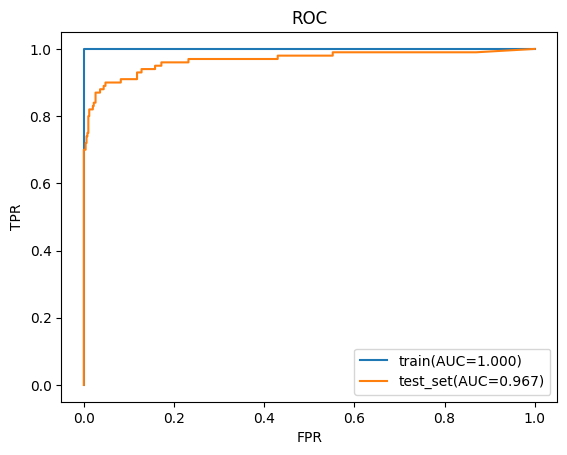

In [10]:
import torch
from src.dataset import imgDataset
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

ada_h = torch.load("runs\\my3_24_24.pt")
d_val = imgDataset("Samples\\train.txt")
d_val_2 = imgDataset("Samples\\val.txt")


pres = ada_h(d_val.imgs)
pres = pres.detach().numpy()
fpr, tpr, thresholds = roc_curve(1 - d_val.labels, pres[:, 0])
print(auc(fpr, tpr))
auc1=auc(fpr, tpr)
pres = ada_h(d_val_2.imgs)
pres = pres.detach().numpy()
fpr2, tpr2, thresholds = roc_curve(1 - d_val_2.labels, pres[:, 0])
print(auc(fpr2, tpr2))
auc2=auc(fpr2, tpr2)
plt.title("ROC")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.plot(fpr, tpr,label="train(AUC=%0.3f)"%auc1)
plt.plot(fpr2, tpr2,label="test_set(AUC=%0.3f)"%auc2)
plt.legend()
plt.show()

## 测试

In [ ]:
from src.dataset import trans_pil_320_320
from PIL import Image
import torch
from src.haar_classifier import mv_windows, nms
from tools.evalfunc import draw_bdbox
import cv2
import matplotlib.pyplot as plt

img_path = "Data\Caltech_WebFaces\pic00010.jpg"
ada_h = torch.load("runs\\my_24_24.pt")
cuda = torch.device("cuda")
cpu = torch.device("cpu")
std_w, std_h = 320, 320
w_shape = (24, 24)
trust_th = 0.99
iou_th = 0.1

windows = []
for i in range(1, 40):
    for j in range(int(i / 2), int(i * 2)):
        windows.append((6 * (i + 5), 6 * (j + 5)))


pic = Image.open(img_path).convert("L")
w, h = pic.width, pic.height
img = cv2.imread(img_path)
width, height = pic.size
pic = trans_pil_320_320(pic).unsqueeze(0)

ada_h.to(cuda)
boxes = mv_windows(ada_h, pic, windows, w_shape, cuda)
boxes = nms(boxes, 0, trust_th, iou_th)
boxes[:, [0, 2]] = boxes[:, [0, 2]] / std_w * w
boxes[:, [1, 3]] = boxes[:, [1, 3]] / std_h * h
print(boxes)
p = draw_bdbox(img, boxes, thick=2, color=(0, 0, 255))
p = cv2.cvtColor(p, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(p)
plt.show()

tensor([[7.6500e+01, 4.8806e+01, 7.6500e+01, 9.7613e+01, 9.9814e-01, 1.8589e-03]],
       device='cuda:0', grad_fn=<CopySlices>)


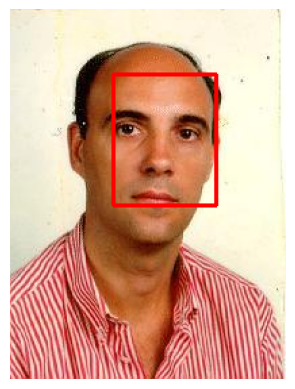

In [12]:
from src.dataset import trans_pil_320_320
from PIL import Image
import torch
from src.haar_classifier import mv_windows, nms
from tools.evalfunc import draw_bdbox
import cv2
import matplotlib.pyplot as plt

img_path = "Data\Caltech_WebFaces\pic00007.jpg"
ada_h = torch.load("runs\\my_24_24.pt")
cuda = torch.device("cuda")
cpu = torch.device("cpu")
std_w, std_h = 320, 320
w_shape = (24, 24)
trust_th = 0.9
iou_th = 0.01

windows = []
for i in range(1, 40):
    for j in range(int(i / 2), int(i * 2)):
        windows.append((6 * (i + 5), 6 * (j + 5)))


pic = Image.open(img_path).convert("L")
w, h = pic.width, pic.height
img = cv2.imread(img_path)
width, height = pic.size
pic = trans_pil_320_320(pic).unsqueeze(0)

ada_h.to(cuda)
boxes = mv_windows(ada_h, pic, windows, w_shape, cuda)
boxes = nms(boxes, 0, trust_th, iou_th)
boxes[:, [0, 2]] = boxes[:, [0, 2]] / std_w * w
boxes[:, [1, 3]] = boxes[:, [1, 3]] / std_h * h
print(boxes)
p = draw_bdbox(img, boxes, thick=2, color=(0, 0, 255))
p = cv2.cvtColor(p, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(p)
plt.show()

# 逻辑回归

## 训练逻辑回归分类器

In [ ]:
import torch
from src.haar_classifier import MLP
from src.dataset import imgDataset
from torch import nn


d_train = imgDataset("Samples\\train.txt")
logistic = MLP([24 * 24, 1], [nn.Sigmoid()])  # 等价于逻辑回归分类器
dev = torch.device("cuda")
lr = 1e-2
epoch = 20000
log_path = "logs\\logistic.txt"

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(params=logistic.parameters(), lr=lr)
logistic = logistic.to(dev)

x = torch.flatten(d_train.imgs, start_dim=1).to(dev)
y = torch.reshape(1 - d_train.labels, (-1, 1)).to(dev).float()
log_c = ""
for i in range(epoch):
    o = logistic(x)
    loss = criterion(o, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    log_c += f"{i+1}-th_Loss: {loss.item()}\n"
    if (i + 1) % 2000 == 0:
        print(f"{i+1}-th Loss: {loss.item()}")
torch.save(logistic, "runs/logistic.pt")
with open(log_path, "w") as f:
    f.write(log_c)

## roc曲线绘制

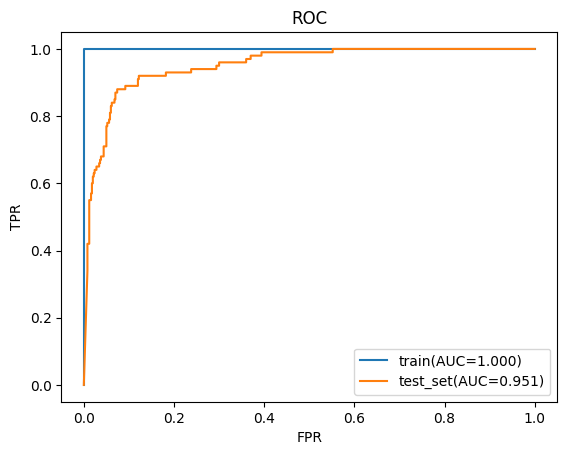

In [9]:
import torch
from src.dataset import imgDataset
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

logistic = torch.load("runs\\logistic.pt")
logistic = logistic.to(torch.device("cpu"))
d_val = imgDataset("Samples\\train.txt")
d_val_2 = imgDataset("Samples\\val.txt")


pres = logistic(torch.flatten(d_val.imgs, start_dim=1))
pres = pres.detach().numpy()
fpr, tpr, thresholds = roc_curve(1 - d_val.labels, pres[:, 0])
auc1=auc(fpr, tpr)

pres = logistic(torch.flatten(d_val_2.imgs, start_dim=1))
pres = pres.detach().numpy()
fpr2, tpr2, thresholds = roc_curve(1 - d_val_2.labels, pres[:, 0])
auc2=auc(fpr2, tpr2)
plt.title("ROC")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.plot(fpr, tpr,label="train(AUC=%0.3f)"%auc1)
plt.plot(fpr2, tpr2,label="test_set(AUC=%0.3f)"%auc2)
plt.legend()
plt.show()

## 训练绘制损失曲线

In [ ]:
import matplotlib.pyplot as plt

with open("logs\logistic.txt", "r") as f:
    l = f.readlines()
count = 0
a, b = [], []
for i in l:
    a.append(count)
    count += 1
    b.append(float(i[:-1].split(" ")[1]))

plt.xlabel("epoch")
plt.ylabel("BCELoss")
plt.plot(a, b)
plt.show()

## 测试

In [ ]:
from src.dataset import trans_pil_320_320
from PIL import Image
import torch
from src.haar_classifier import mv_windows, nms
from tools.evalfunc import draw_bdbox
import cv2
import matplotlib.pyplot as plt

img_path = "Data\Caltech_WebFaces\pic00010.jpg"
ada_h = torch.load("runs\\logistic.pt")
cuda = torch.device("cuda")
cpu = torch.device("cpu")
std_w, std_h = 320, 320
w_shape = (24, 24)
trust_th = 0.99
iou_th = 0.05

windows = []
for i in range(1, 40):
    for j in range(int(i / 2), int(i * 2)):
        windows.append((6 * (i + 5), 6 * (j + 5)))

pic = Image.open(img_path).convert("L")
w, h = pic.width, pic.height
img = cv2.imread(img_path)
width, height = pic.size
pic = trans_pil_320_320(pic).unsqueeze(0)

ada_h.to(cuda)
boxes = mv_windows(ada_h, pic, windows, w_shape, cuda, need_flat=True)
boxes = nms(boxes, 0, trust_th, iou_th)
boxes[:, [0, 2]] = boxes[:, [0, 2]] / std_w * w
boxes[:, [1, 3]] = boxes[:, [1, 3]] / std_h * h
print(boxes)
p = draw_bdbox(img, boxes, thick=2, color=(255, 0, 0))
print
p = cv2.cvtColor(p, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(p)
plt.show()

tensor([[ 68.8500,  53.9438,  68.8500, 107.8875,   1.0000]], device='cuda:0',
       grad_fn=<CopySlices>)


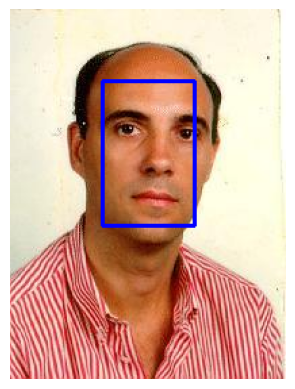

In [11]:
from src.dataset import trans_pil_320_320
from PIL import Image
import torch
from src.haar_classifier import mv_windows, nms
from tools.evalfunc import draw_bdbox
import cv2
import matplotlib.pyplot as plt

img_path = "Data\Caltech_WebFaces\pic00007.jpg"
ada_h = torch.load("runs\\logistic.pt")
cuda = torch.device("cuda")
cpu = torch.device("cpu")
std_w, std_h = 320, 320
w_shape = (24, 24)
trust_th = 0.999999
iou_th = 0.05

windows = []
for i in range(1, 40):
    for j in range(int(i / 2), int(i * 2)):
        windows.append((6 * (i + 5), 6 * (j + 5)))


pic = Image.open(img_path).convert("L")
w, h = pic.width, pic.height
img = cv2.imread(img_path)
width, height = pic.size
pic = trans_pil_320_320(pic).unsqueeze(0)

ada_h.to(cuda)
boxes = mv_windows(ada_h, pic, windows, w_shape, cuda, need_flat=True)
boxes = nms(boxes, 0, trust_th, iou_th)
boxes[:, [0, 2]] = boxes[:, [0, 2]] / std_w * w
boxes[:, [1, 3]] = boxes[:, [1, 3]] / std_h * h
print(boxes)
p = draw_bdbox(img, boxes, color=(255, 0, 0), thick=2)
p = cv2.cvtColor(p, cv2.COLOR_BGR2RGB)
plt.imshow(p)
plt.axis("off")
plt.show()

## 计算两种方法的IOU

In [ ]:
import numpy as np
from tools.evalfunc import compute_iou_matrix

bt=np.array([[60,69,78,133]])
be = np.array(
    [
        [5.0859e01, 6.3281e01, 1.0172e02, 1.2656e02],
        [56.9625, 89.0625, 56.9625, 89.0625],
    ]
)
print(compute_iou_matrix(bt,be))

In [ ]:
import numpy as np
from tools.evalfunc import compute_iou_matrix

bt = np.array([[65, 48, 88, 123]])
be = np.array(
    [
        [7.6500e01, 4.8806e01, 7.6500e01, 9.7613e01],
        [68.8500, 53.9438, 68.8500, 107.8875],
    ]
)
print(compute_iou_matrix(bt, be))